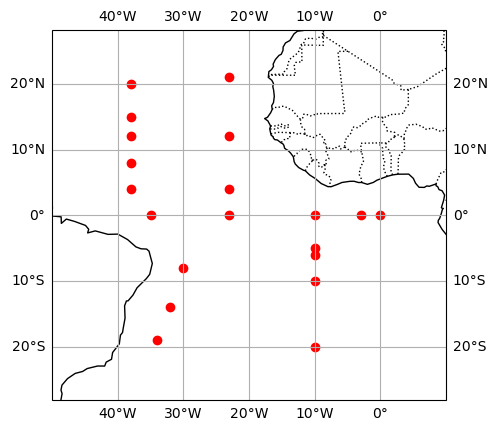

In [1]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Substitua 'lat' pelo nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Substitua 'lon' pelo nome correto da variável de longitude
    return lat, lon

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"

# Usando glob para criar uma lista com todos os arquivos NetCDF na pasta
arquivos_netCDF = glob.glob(caminho_pasta)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionando os recursos do mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-50, 10, -25, 25])  # Ajuste os limites para focar no Oceano Atlântico

# Adicionando linhas de grade
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# Loop para ler cada arquivo, extrair as coordenadas e plotar no mapa
for arquivo in arquivos_netCDF:
    lat, lon = ler_coordenadas(arquivo)
    ax.plot(lon, lat, 'ro', transform=ccrs.Geodetic())  # 'ro' cria pontos vermelhos
    

plt.show()

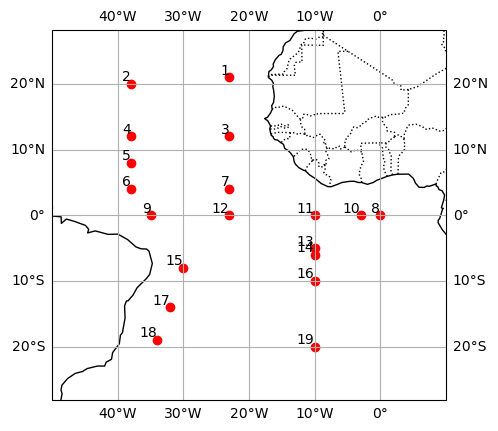

In [2]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Assumindo que 'lat' é o nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Assumindo que 'lon' é o nome correto da variável de longitude
    ds.close()  # É uma boa prática fechar o arquivo NetCDF após o uso
    return lat, lon, arquivo

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler as coordenadas de todos os arquivos para ordená-los
coordenadas_arquivos = [ler_coordenadas(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os arquivos pela latitude, do maior (norte) para o menor (sul)
arquivos_ordenados = sorted(coordenadas_arquivos, key=lambda x: x[0], reverse=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-50, 10, -25, 25])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Loop para ler cada arquivo ordenado, extrair as coordenadas, plotar no mapa e adicionar um número
for i, (lat, lon, arquivo) in enumerate(arquivos_ordenados):
    ax.plot(lon, lat, 'ro', transform=ccrs.Geodetic())  # 'ro' cria pontos vermelhos
    ax.text(lon, lat, str(i+1), transform=ccrs.Geodetic(), ha='right', va='bottom')

plt.show()



# TEMPERATURA DO AR

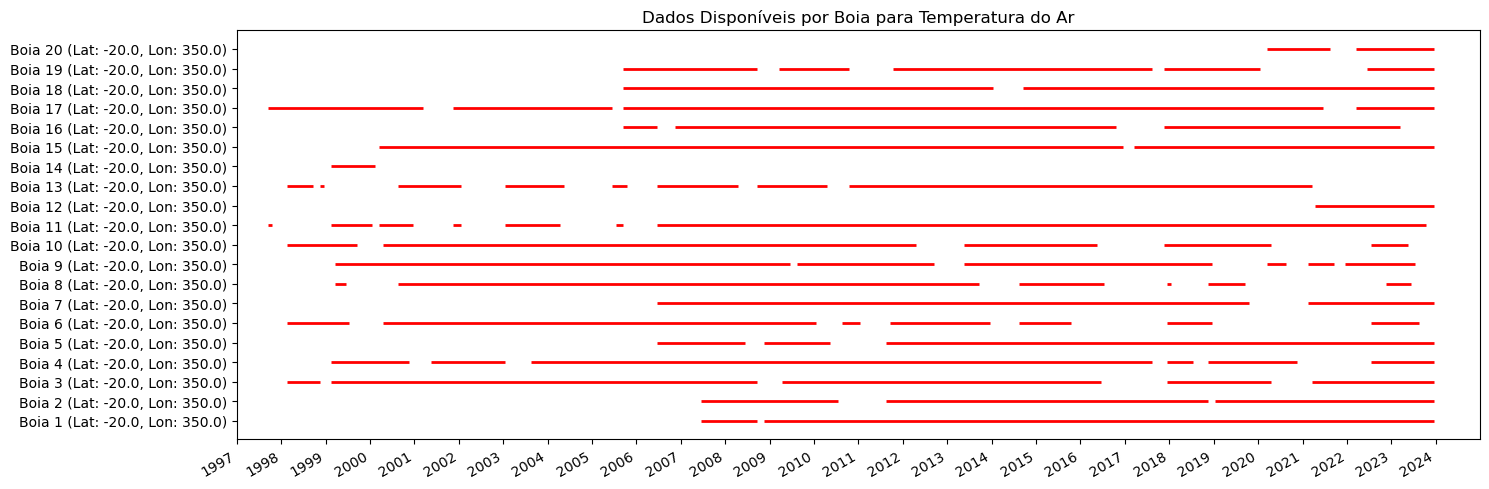

In [4]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (_, _, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Temperatura do Ar")


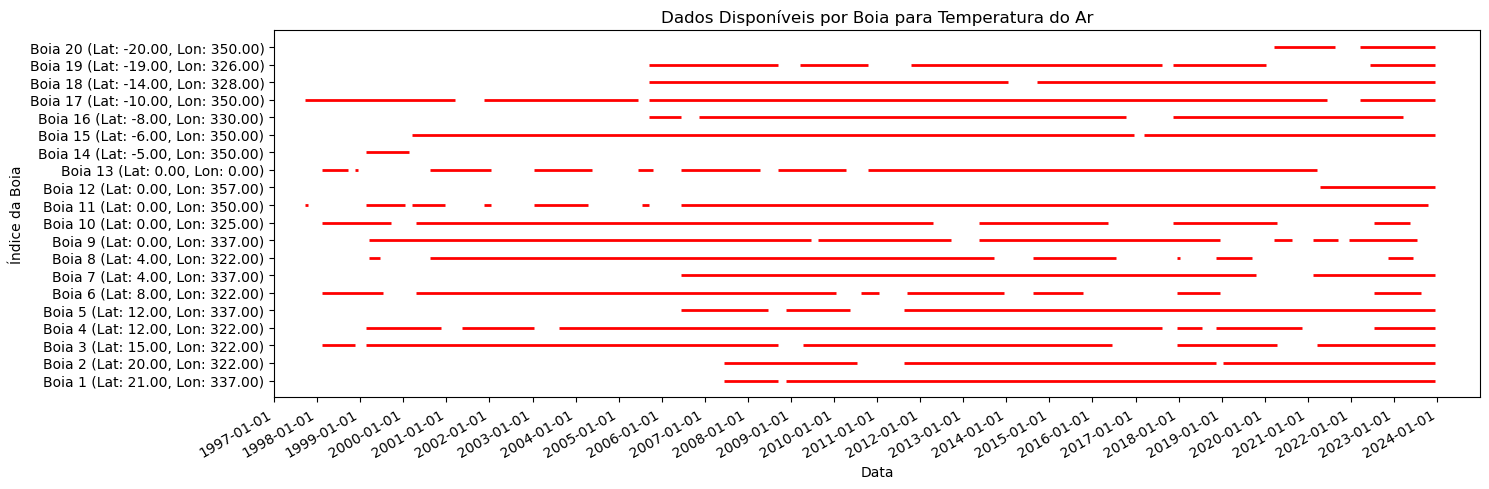

In [9]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Temperatura do Ar")


# Temperatura da Superfície do Mar

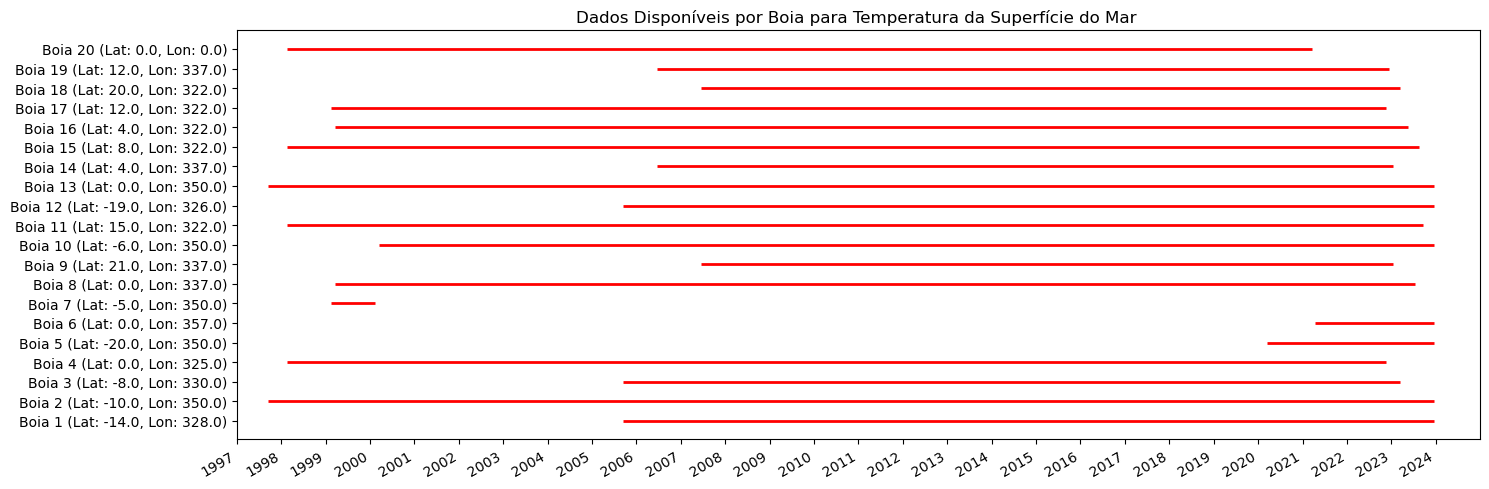

In [2]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['T_25'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/SST/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Temperatura da Superfície do Mar ")

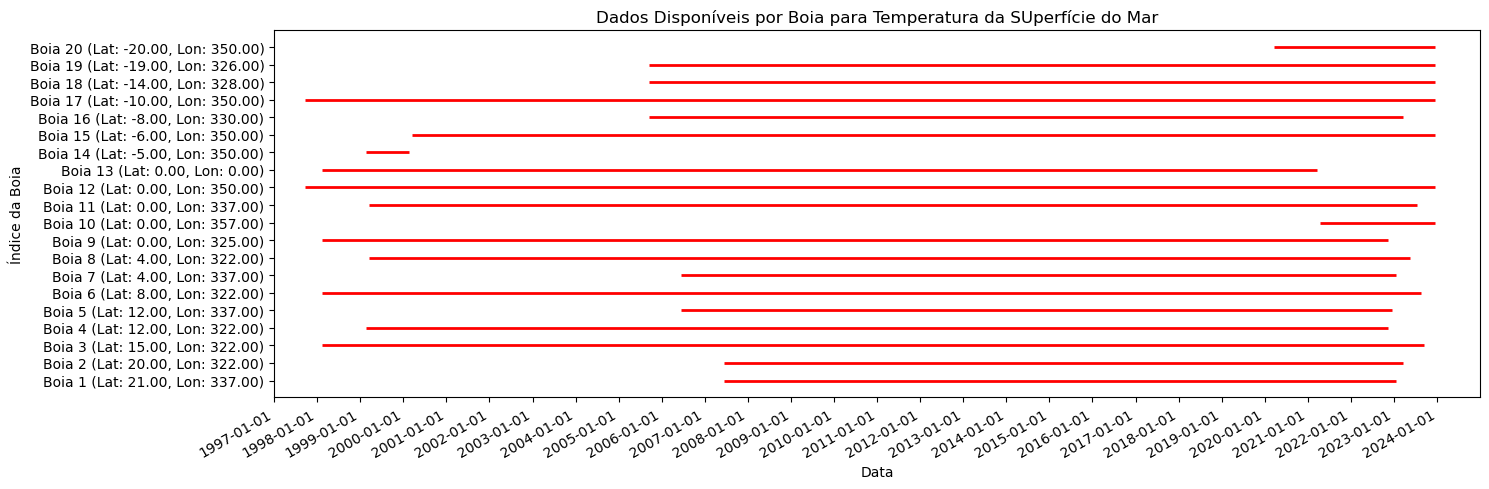

In [11]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['T_25'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/SST/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Temperatura da SUperfície do Mar")

# UMIDADE RELATIVA

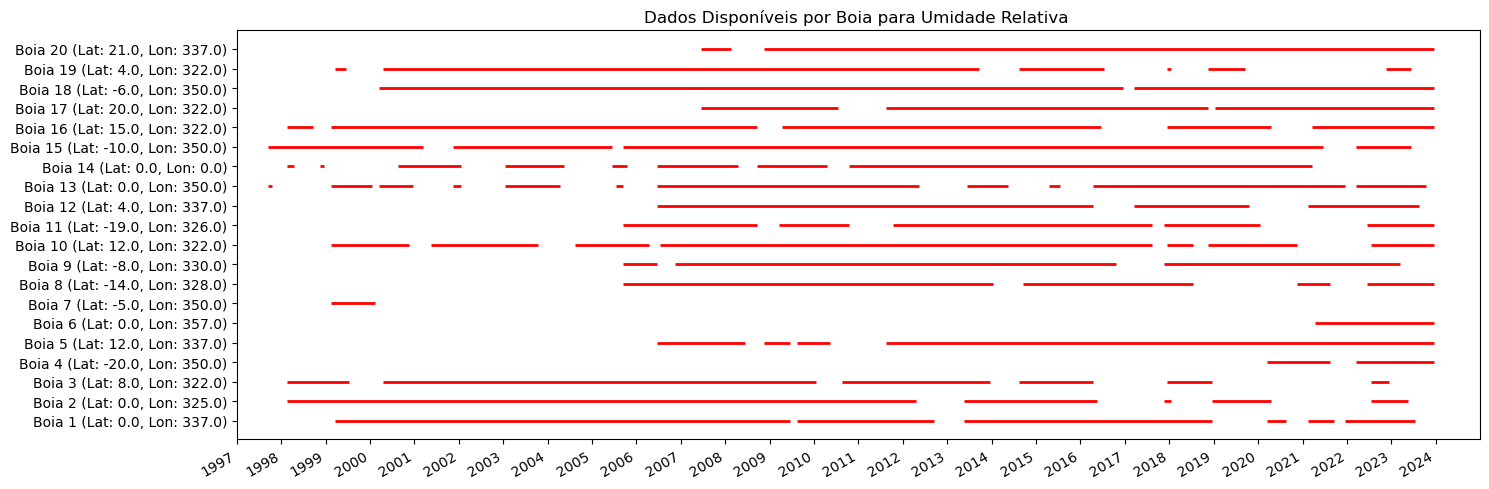

In [3]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['RH_910'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/RH/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Umidade Relativa ")

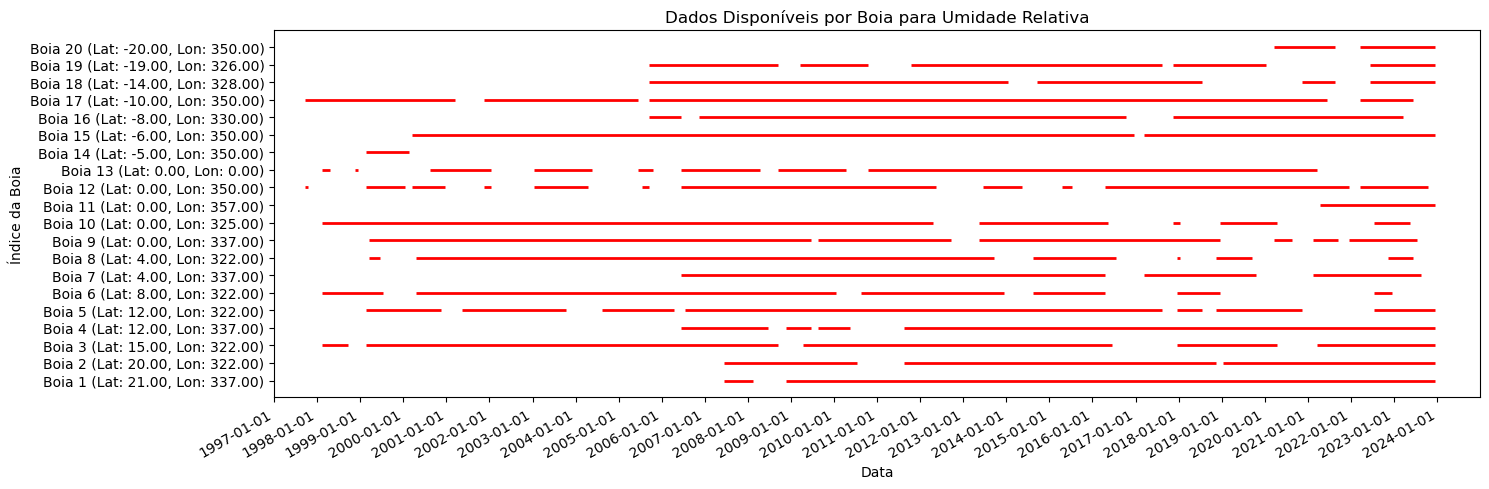

In [12]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['RH_910'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/RH/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Umidade Relativa")

# VENTO U

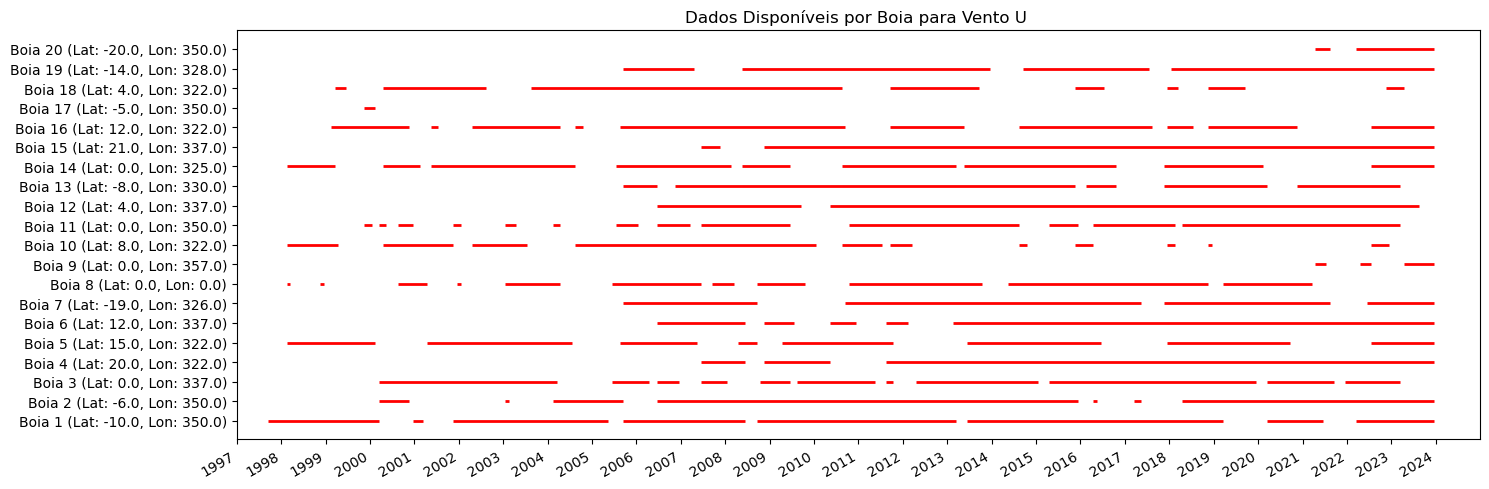

In [4]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WU_422'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/u/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento U ")

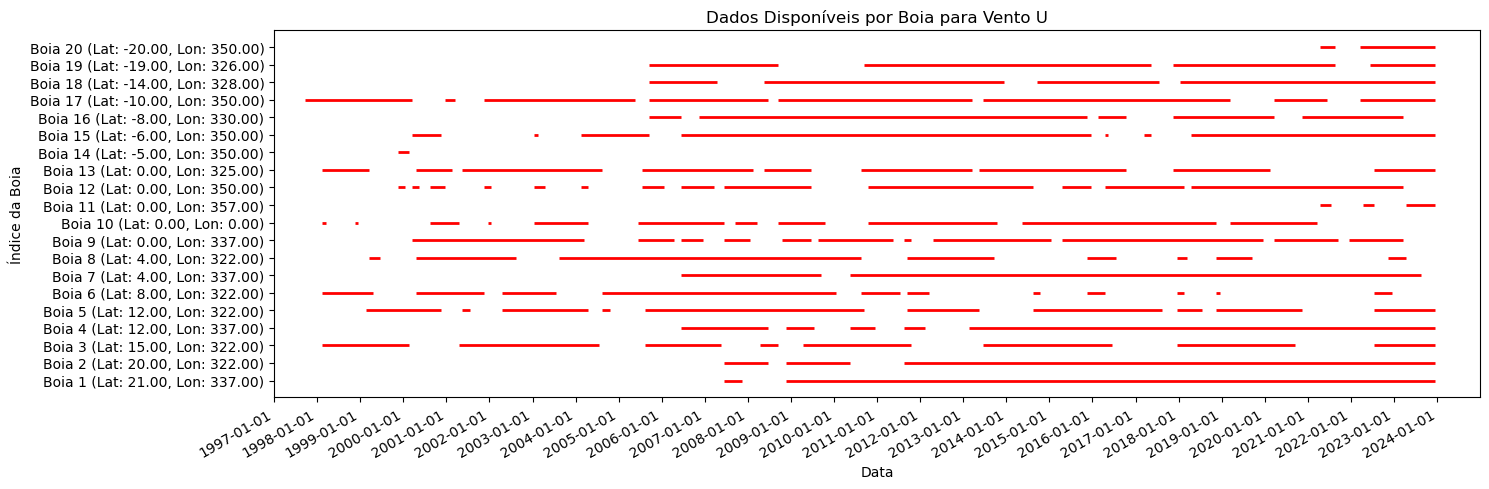

In [13]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WU_422'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/u/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento U")

# VENTO V

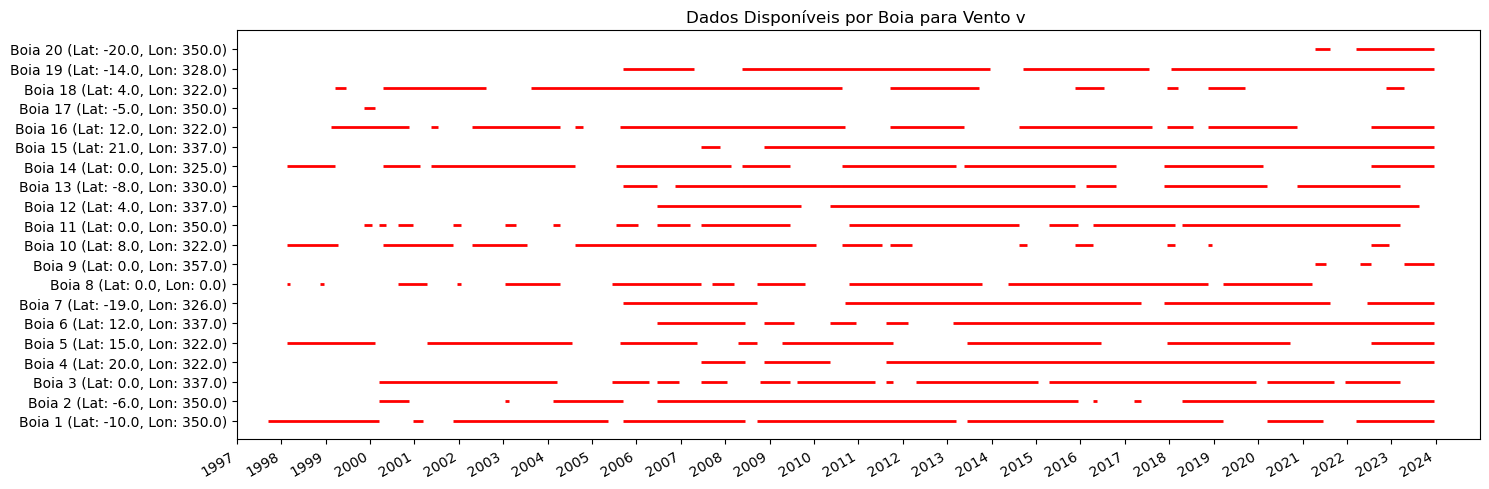

In [5]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WV_423'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/v/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento v ")

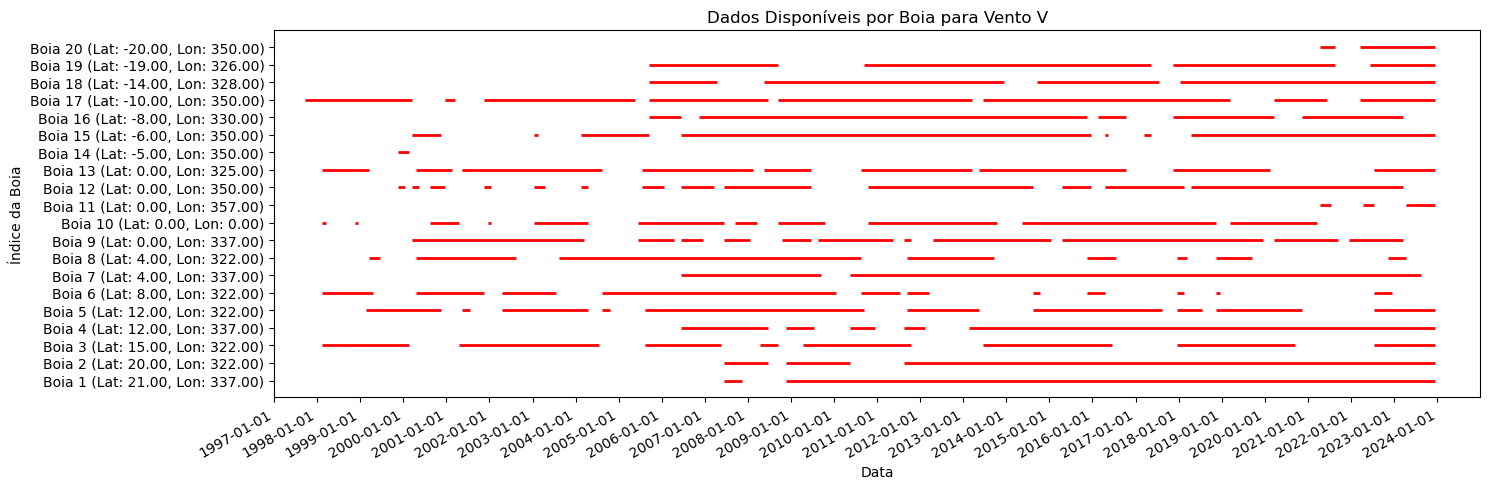

In [14]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WV_423'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/u/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento V")

# Vento w

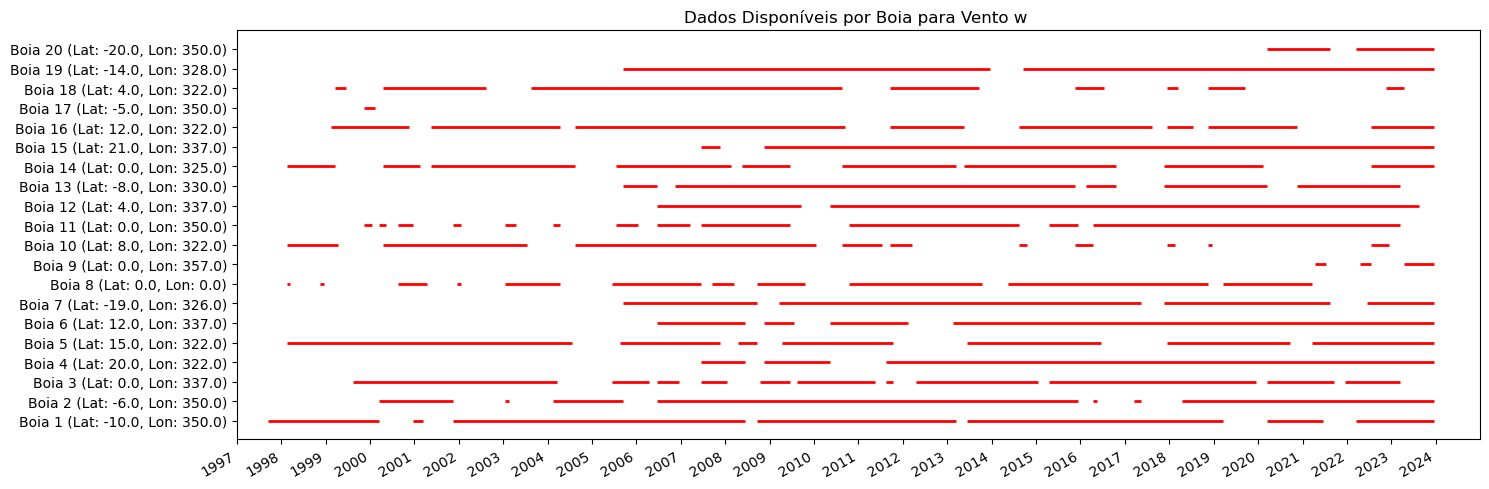

In [6]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WS_401'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/w/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento w ")

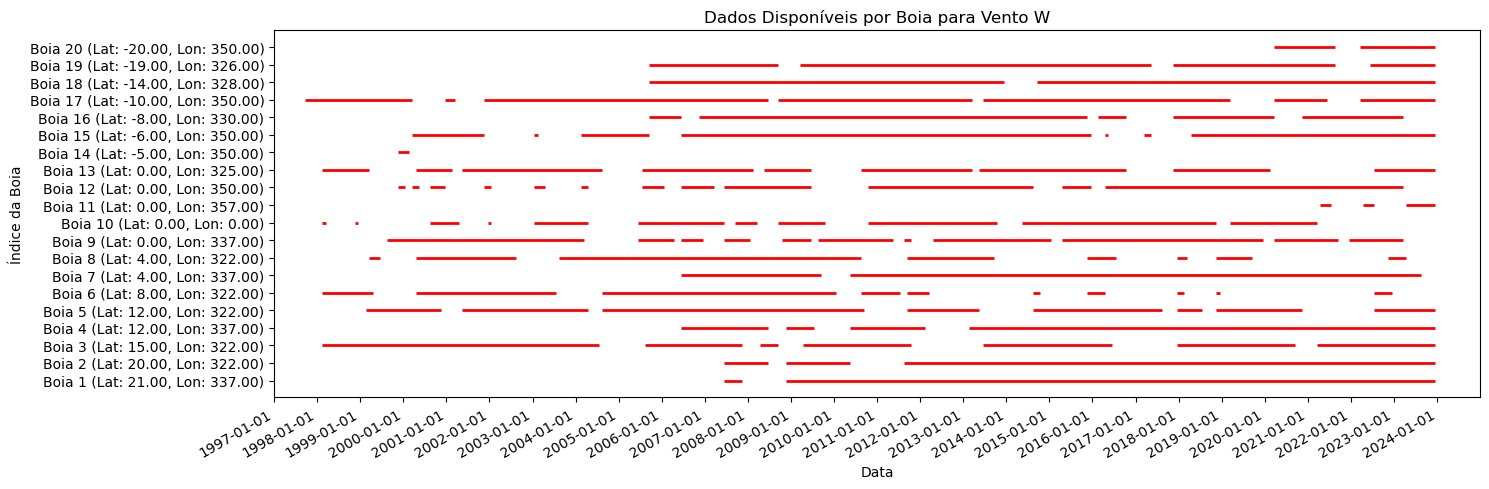

In [16]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

# Função para ler os dados de cada arquivo NetCDF
def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['WS_401'][:]
    
    fill_value = 1e35
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    ds.close()

    return lat.mean(), lon.mean(), datas, temperatura

# Caminho para os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/Wind/u/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler dados de todas as boias
dados_boias = [ler_dados(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os dados das boias pela latitude (do norte para o sul)
dados_boias.sort(key=lambda x: x[0], reverse=True)

# Função para plotar as séries temporais
def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Índice da Boia')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.2f}, Lon: {lon:.2f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()  # Auto-formata a data
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com os dados ordenados
plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Vento W")